In [ ]:
import pandas as pd

data = pd.read_csv("dataset_tojson.csv")


# Filtering rows where 'Index' or 'Middle' is 0 and keeping the rest
data = data[(data['Index'] != 0) & (data['Middle'] != 0)  & (data['Ring'] != 0) ]

print(data)


      Index  Middle  Pinky  Ring  Thumb      X     Y        Word
0      3855    3903   3846  4375      0  49.58  3.92       Hello
1      3855    3942   2653  4355    846  49.53  3.89       Hello
2      3855    3894   2807  4375     38  49.50  3.88       Hello
3      3875    3903   2692  4384     38  49.55  3.84       Hello
4      3788    3846   2692  4346    307  49.48  4.09       Hello
...     ...     ...    ...   ...    ...    ...   ...         ...
3082   3625    2105   5038  2000   4115  51.37  6.31  I love you
3083   3663    2153   6307  1384   4115  51.34  6.33  I love you
3084   3692    2144   5038  2028   4307  51.14  6.53  I love you
3085   3663    2125   5038  2000   3923  51.45  6.55  I love you
3086   3634    2115   4923  2000   3846  51.40  6.47  I love you

[2895 rows x 8 columns]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import joblib
from scipy import stats

# Load JSON data into a DataFrame
df = pd.read_json('csv_clean.json')

# Assuming your JSON data has columns 'feature1', 'feature2', ..., 'target'
# Adjust column names as needed
X = df[['Index','Middle','Pinky', 'Ring','Thumb','X','Y']]  # Replace with the actual feature columns
y = df['Word']  # Replace with the actual target column

# Step 1: Outlier Detection using Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
z_scores = stats.zscore(X_scaled)

# Assuming a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 2
outlier_indices = (z_scores > threshold).any(axis=1)

# Remove rows with outliers
X_no_outliers = X_scaled[~outlier_indices]
y_no_outliers = y[~outlier_indices]

# Split the data into training and testing sets after removing outliers
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Create a k-NN classifier
k = 8 # Number of neighbors
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = knn_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Save the trained scaler to a file
joblib.dump(scaler, 'trained_scaler.pkl')

# Save the trained k-NN classifier model to a .pkl file
joblib.dump(knn_classifier, 'model.pkl')


In [ ]:
# prompt: performance analysis

from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[30  0  0  0  0  1  0  0  1  0]
 [ 1 43  5  0  0  0  0  1  1  0]
 [ 0  3 41  0  1  0  0  1  0  0]
 [ 0  0  0 49  0  0  6  0  0  0]
 [ 0  0  0  0 53  0  1  0  0  2]
 [ 1  0  0  0  3 55  0  0  1  0]
 [ 0  0  0  1  0  0 44  0  0  0]
 [ 0  1  1  0  0  0  0 48  0  0]
 [ 1  0  0  0  0  4  1  0 57  2]
 [ 0  0  0  0  0  0  0  0  1 55]]
              precision    recall  f1-score   support

        Fine       0.91      0.94      0.92        32
     Goodbye       0.91      0.84      0.88        51
       Hello       0.87      0.89      0.88        46
  I hate you       0.98      0.89      0.93        55
  I love you       0.93      0.95      0.94        56
         I'm       0.92      0.92      0.92        60
          No       0.85      0.98      0.91        45
          Ok       0.96      0.96      0.96        50
         Yes       0.93      0.88      0.90        65
         You       0.93      0.98      0.96        56

    accuracy                           0.92       516
   macro avg       

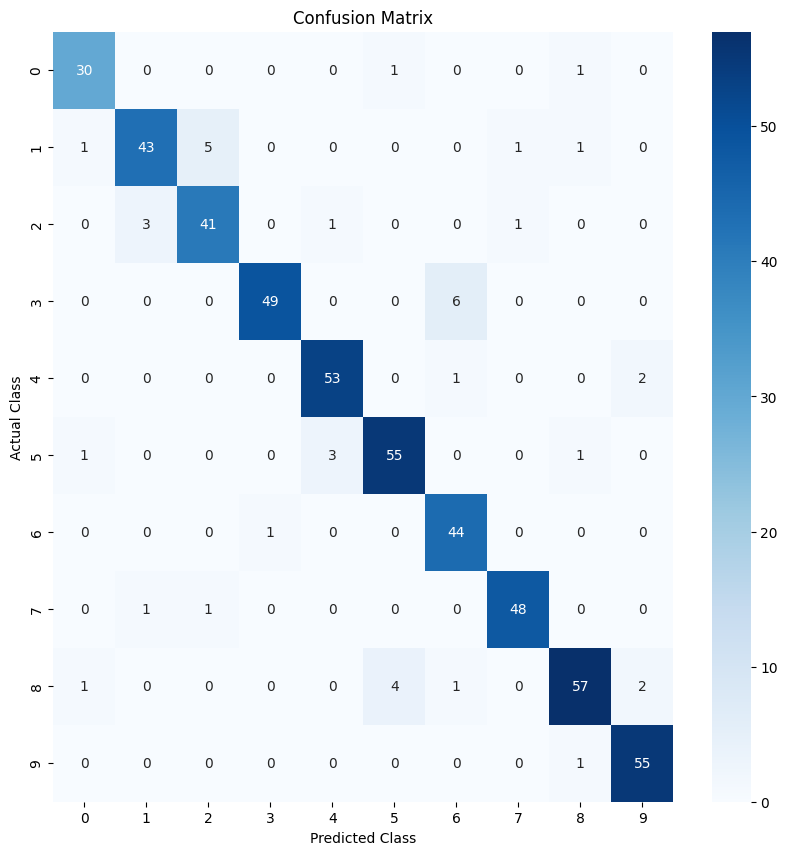

In [ ]:
# prompt: confusion matrix visualization

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
